In [8]:
import pandas as pd

In [9]:
x_train = pd.read_csv('X_train.csv')
x_train

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0
...,...,...,...,...,...,...,...,...,...,...
4955,16898,merc,GL Class,2015,Automatic,24314,Diesel,125.0,56.6,2.1
4956,14416,bmw,6 Series,2017,Automatic,18000,Diesel,145.0,51.4,3.0
4957,15453,vw,CC,2015,Manual,84932,Diesel,30.0,60.1,2.0
4958,14666,audi,A7,2017,Semi-Auto,30150,Diesel,145.0,62.8,3.0


In [10]:
y_train = pd.read_csv('y_train.csv')
y_train

,carID,price
0,13207,31995
1,17314,7700
2,12342,58990
3,13426,12999
4,16004,16990
...,...,...
4955,16898,17999
4956,14416,28900
4957,15453,8998
4958,14666,23198


In [11]:
df_train = x_train.merge(y_train, on='carID')
df_train

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2,31995
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0,7700
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9,58990
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0,12999
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0,16990
...,...,...,...,...,...,...,...,...,...,...,...
4955,16898,merc,GL Class,2015,Automatic,24314,Diesel,125.0,56.6,2.1,17999
4956,14416,bmw,6 Series,2017,Automatic,18000,Diesel,145.0,51.4,3.0,28900
4957,15453,vw,CC,2015,Manual,84932,Diesel,30.0,60.1,2.0,8998
4958,14666,audi,A7,2017,Semi-Auto,30150,Diesel,145.0,62.8,3.0,23198


In [12]:
df_train.shape

(4960, 11)

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4960 entries, 0 to 4959
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carID         4960 non-null   int64  
 1   brand         4960 non-null   object 
 2   model         4960 non-null   object 
 3   year          4960 non-null   int64  
 4   transmission  4960 non-null   object 
 5   mileage       4960 non-null   int64  
 6   fuelType      4960 non-null   object 
 7   tax           4960 non-null   float64
 8   mpg           4960 non-null   float64
 9   engineSize    4960 non-null   float64
 10  price         4960 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 465.0+ KB


In [14]:
df_train.nunique()

carID           4960
brand              9
model             90
year              24
transmission       4
mileage         3900
fuelType           5
tax               41
mpg              125
engineSize        37
price           2279
dtype: int64

In [15]:
df_train[0:].describe()

,carID,year,mileage,tax,mpg,engineSize,price
count,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000
mean,15832.446169,2016.737903,24956.286895,152.332661,50.370766,2.124375,23469.943750
std,2206.717006,2.884035,24443.333662,82.403844,35.746505,0.789368,16406.714563
min,12002.000000,1997.000000,1.000000,0.000000,2.800000,0.000000,450.000000
25%,13929.250000,2016.000000,5641.250000,145.000000,38.700000,1.600000,12000.000000
50%,15840.000000,2017.000000,19000.000000,145.000000,47.100000,2.000000,18999.000000
75%,17765.750000,2019.000000,36702.000000,150.000000,54.300000,2.800000,30335.750000
max,19629.000000,2020.000000,259000.000000,580.000000,470.800000,6.600000,145000.000000


In [16]:
df_train.drop_duplicates(keep='first', inplace=True)

In [17]:
cat_cols = []
num_cols = []

In [18]:
for i in df_train.columns:
    if str(df_train[i].dtype) in 'object':
        cat_cols.append(i)
    else:
        num_cols.append(i)

In [19]:
cat_cols

['brand', 'model', 'transmission', 'fuelType']

In [20]:
num_cols

['carID', 'year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

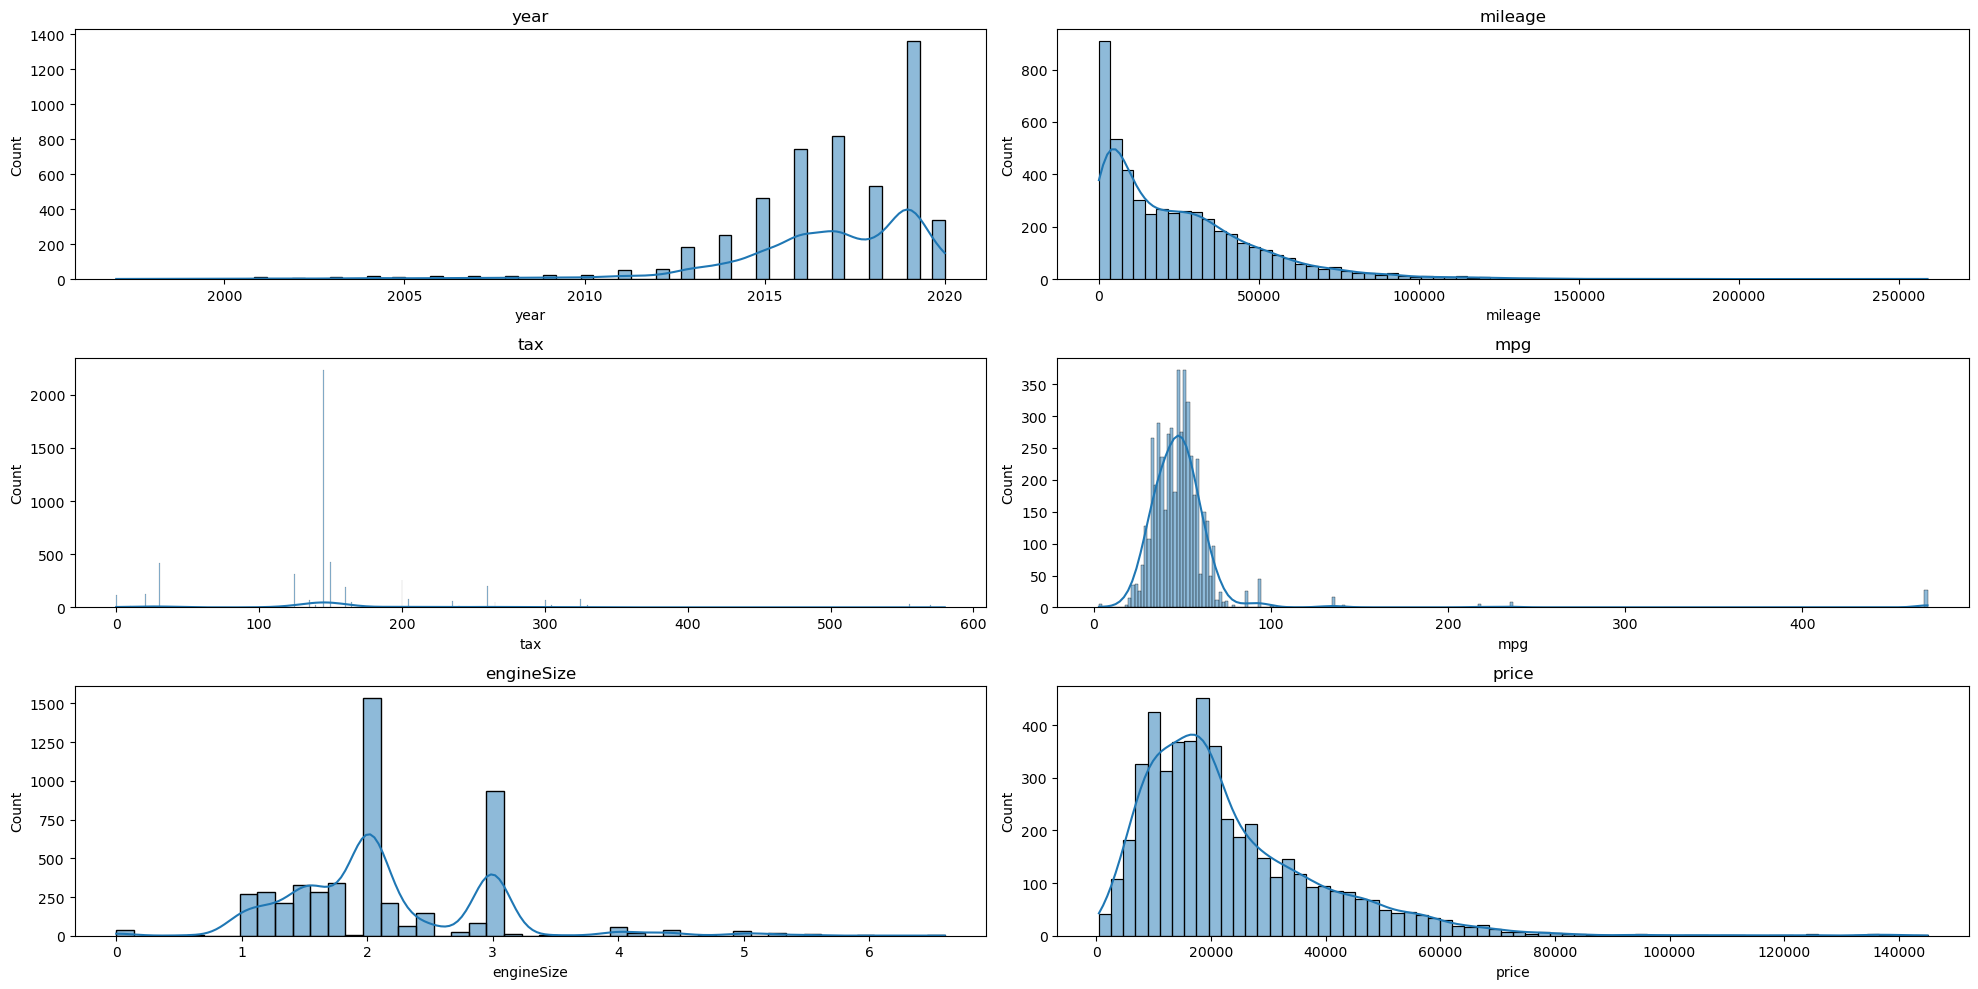

In [22]:
plt.figure(figsize=(20,10))
for index,i in enumerate(num_cols[1:]):
    plt.subplot(3,2,index+1)
    plt.tight_layout()
    sns.histplot(df_train[i], kde=True)
    plt.title(i)

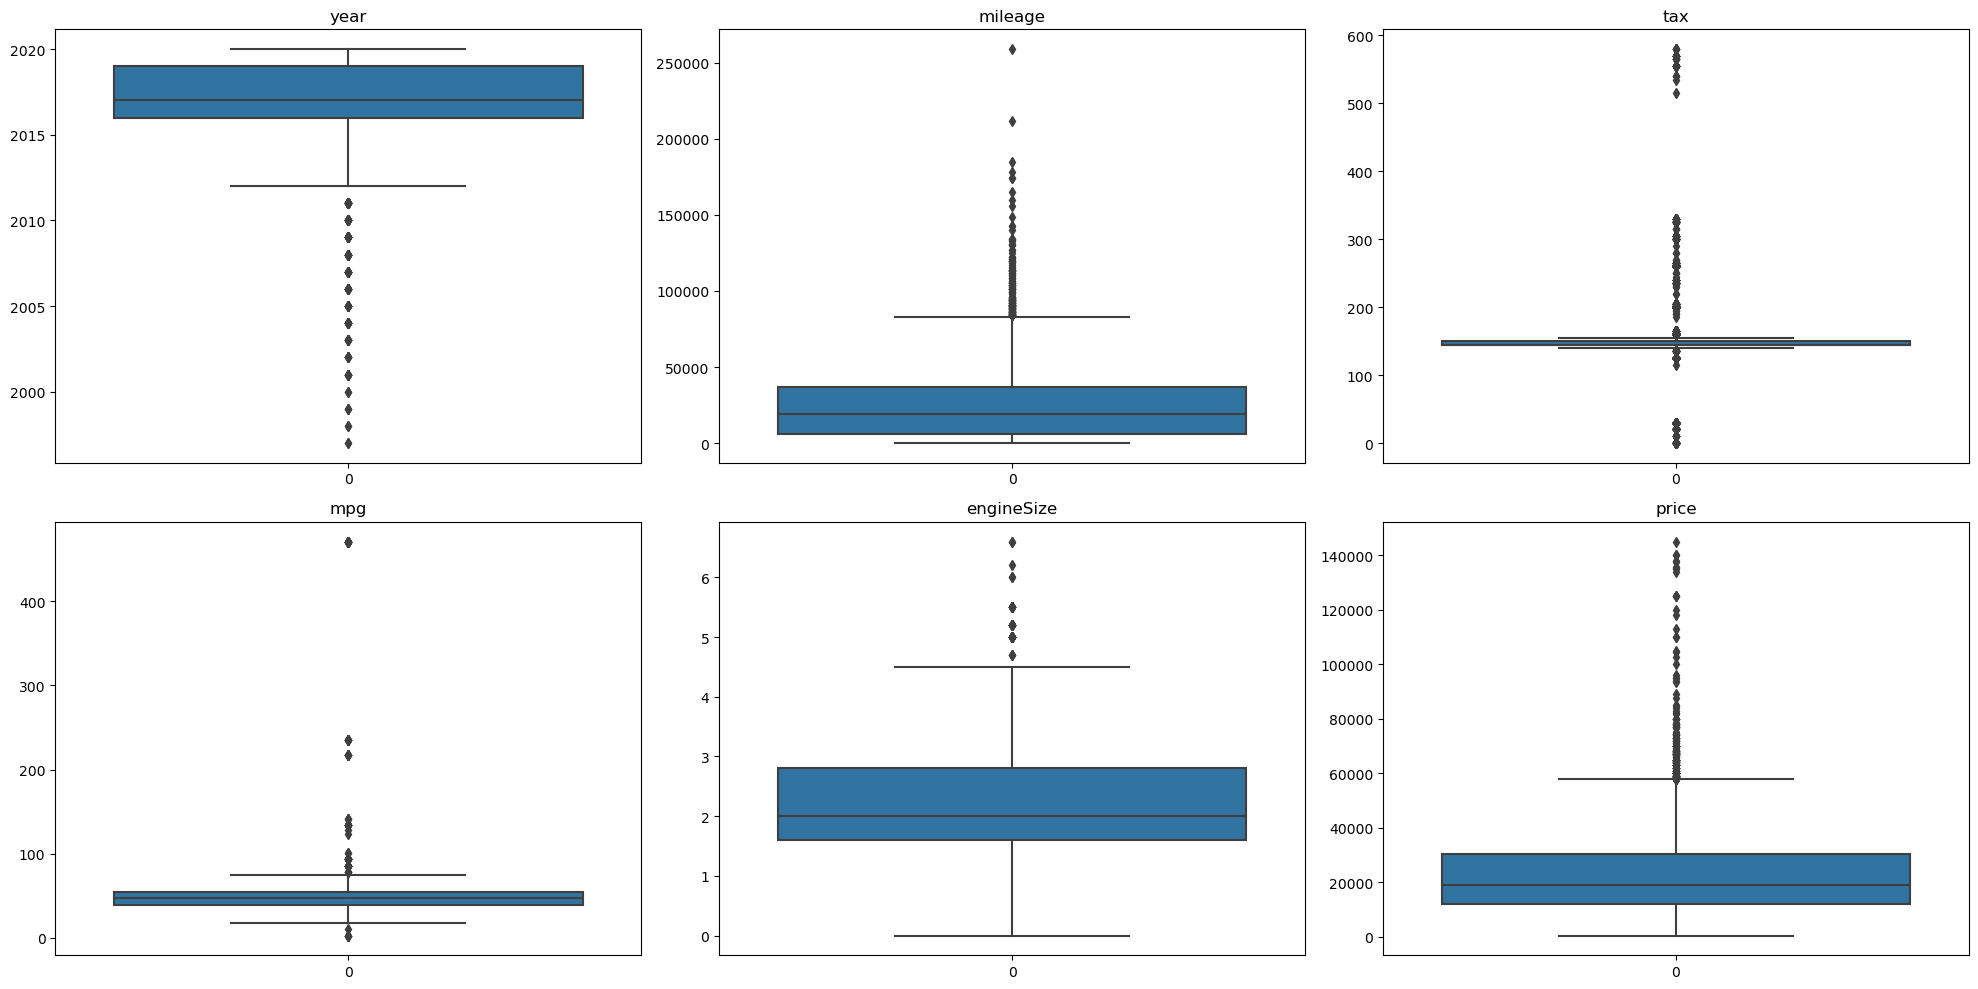

In [23]:
plt.figure(figsize=(20,10))
for index,i in enumerate(num_cols[1:]):
    plt.subplot(2,3,index+1)
    plt.tight_layout()
    sns.boxplot(df_train[i])
    plt.title(i)

Text(0.5, 1.0, 'Tax')

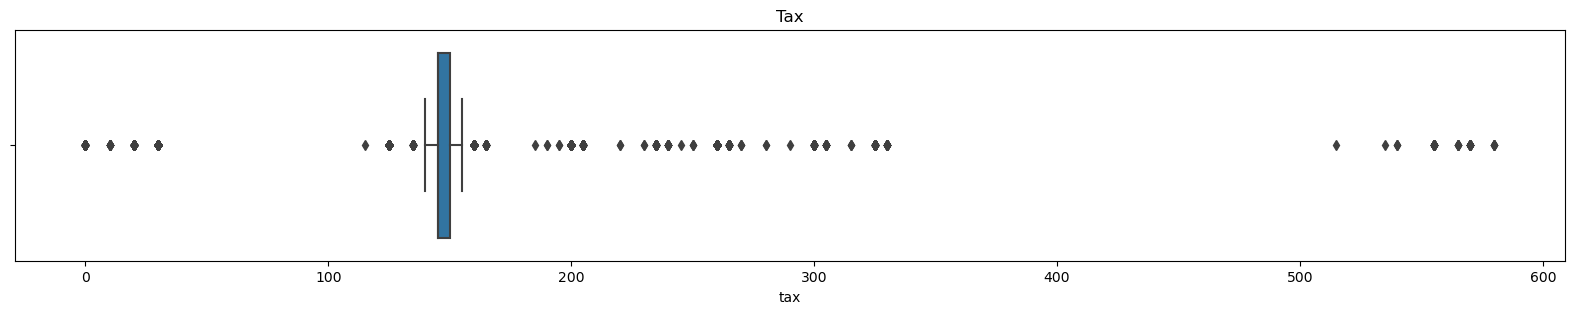

In [24]:
plt.figure(figsize=(20,3))
sns.boxplot(x=df_train['tax'])
plt.title("Tax")

Text(0.5, 1.0, 'mpg')

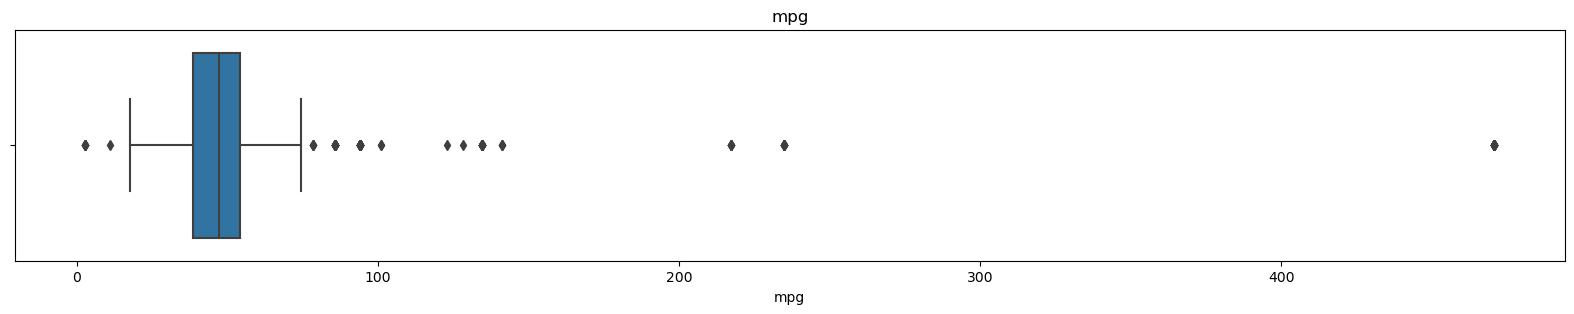

In [25]:
plt.figure(figsize=(20,3))
sns.boxplot(x=df_train['mpg'])
plt.title("mpg")

for year we can instead do a categorical plot instead

''

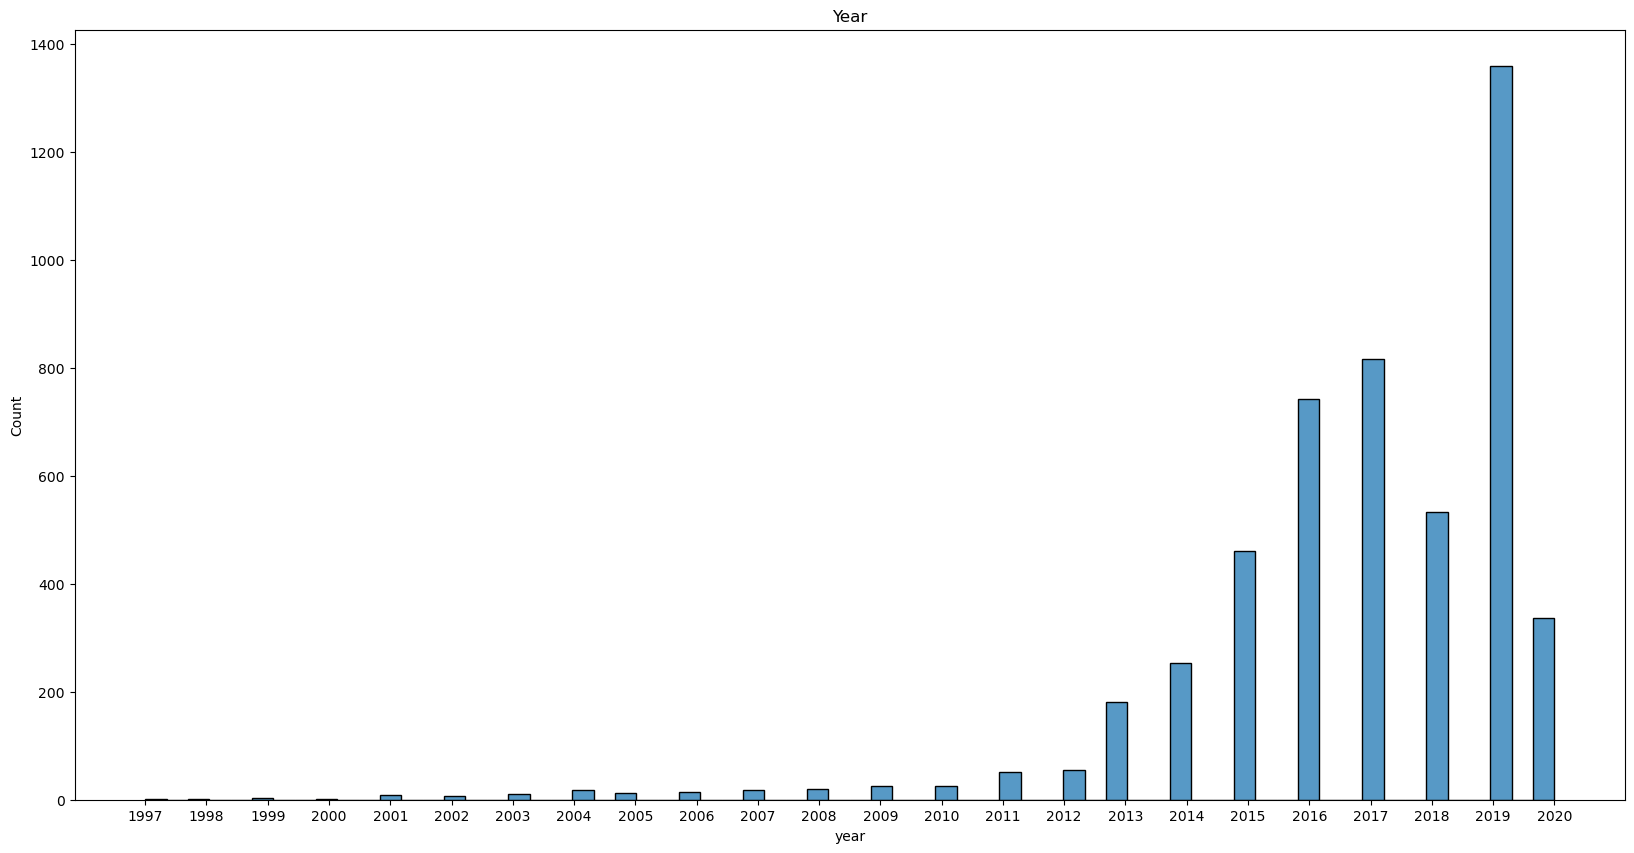

In [26]:
plt.figure(figsize=(20,10))
sns.histplot(df_train['year'])
plt.title('Year')
plt.xticks(df_train.year.unique())
;

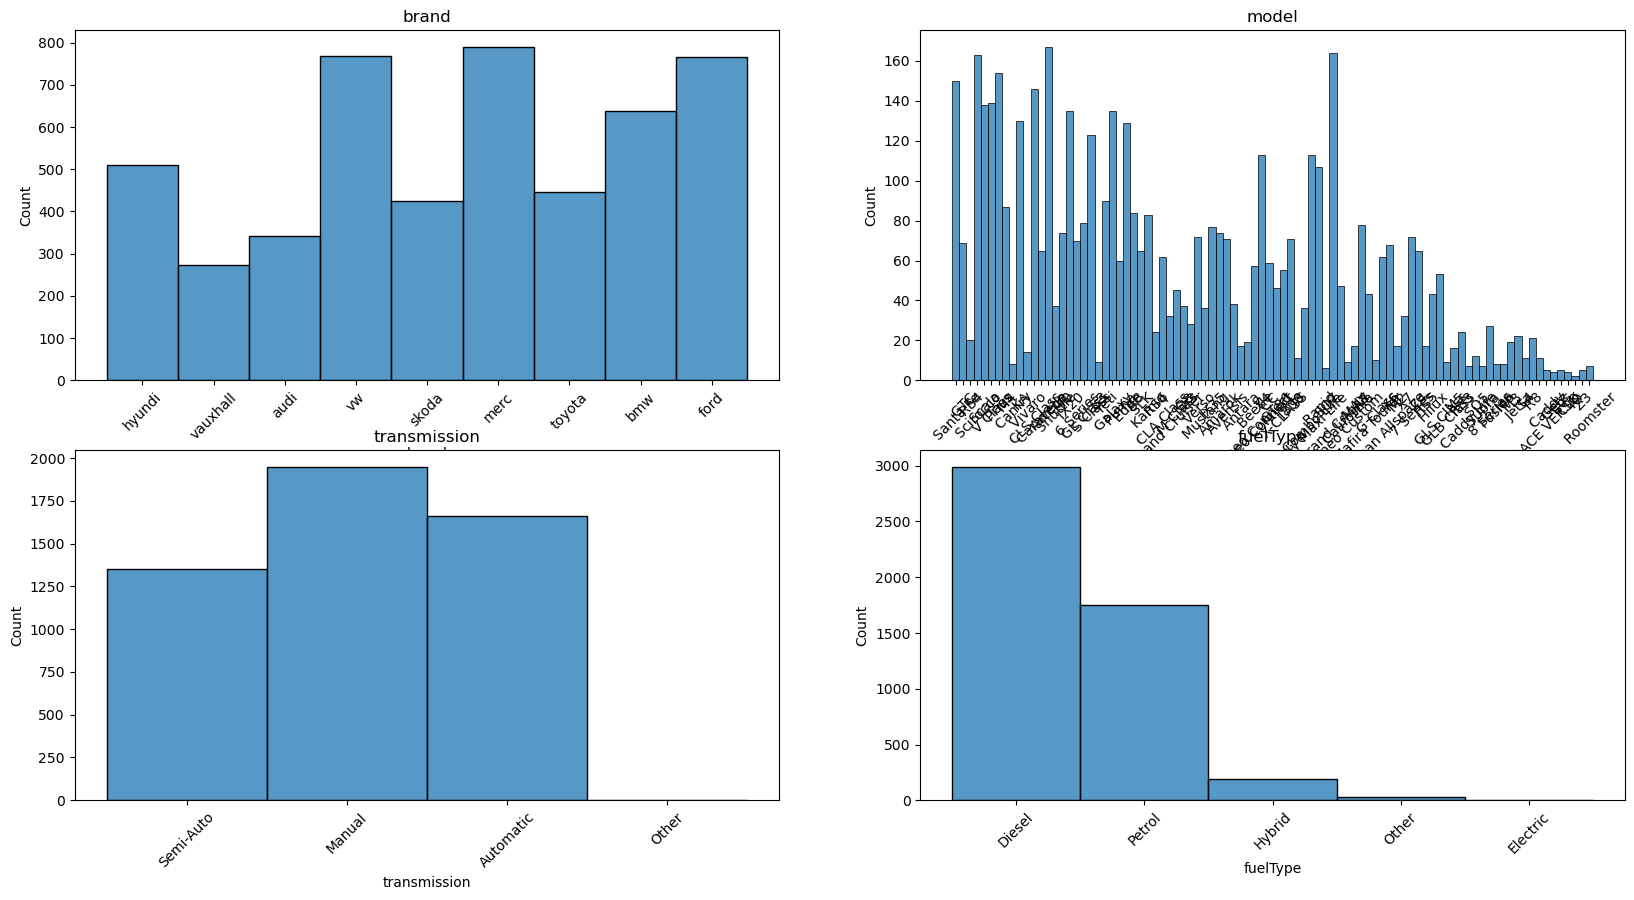

In [27]:
plt.figure(figsize=(20,10))
for index,i in enumerate(cat_cols):
    plt.subplot(2,2,index+1)
    sns.histplot(df_train[i])
    plt.title(i)
    plt.xticks(rotation=45)

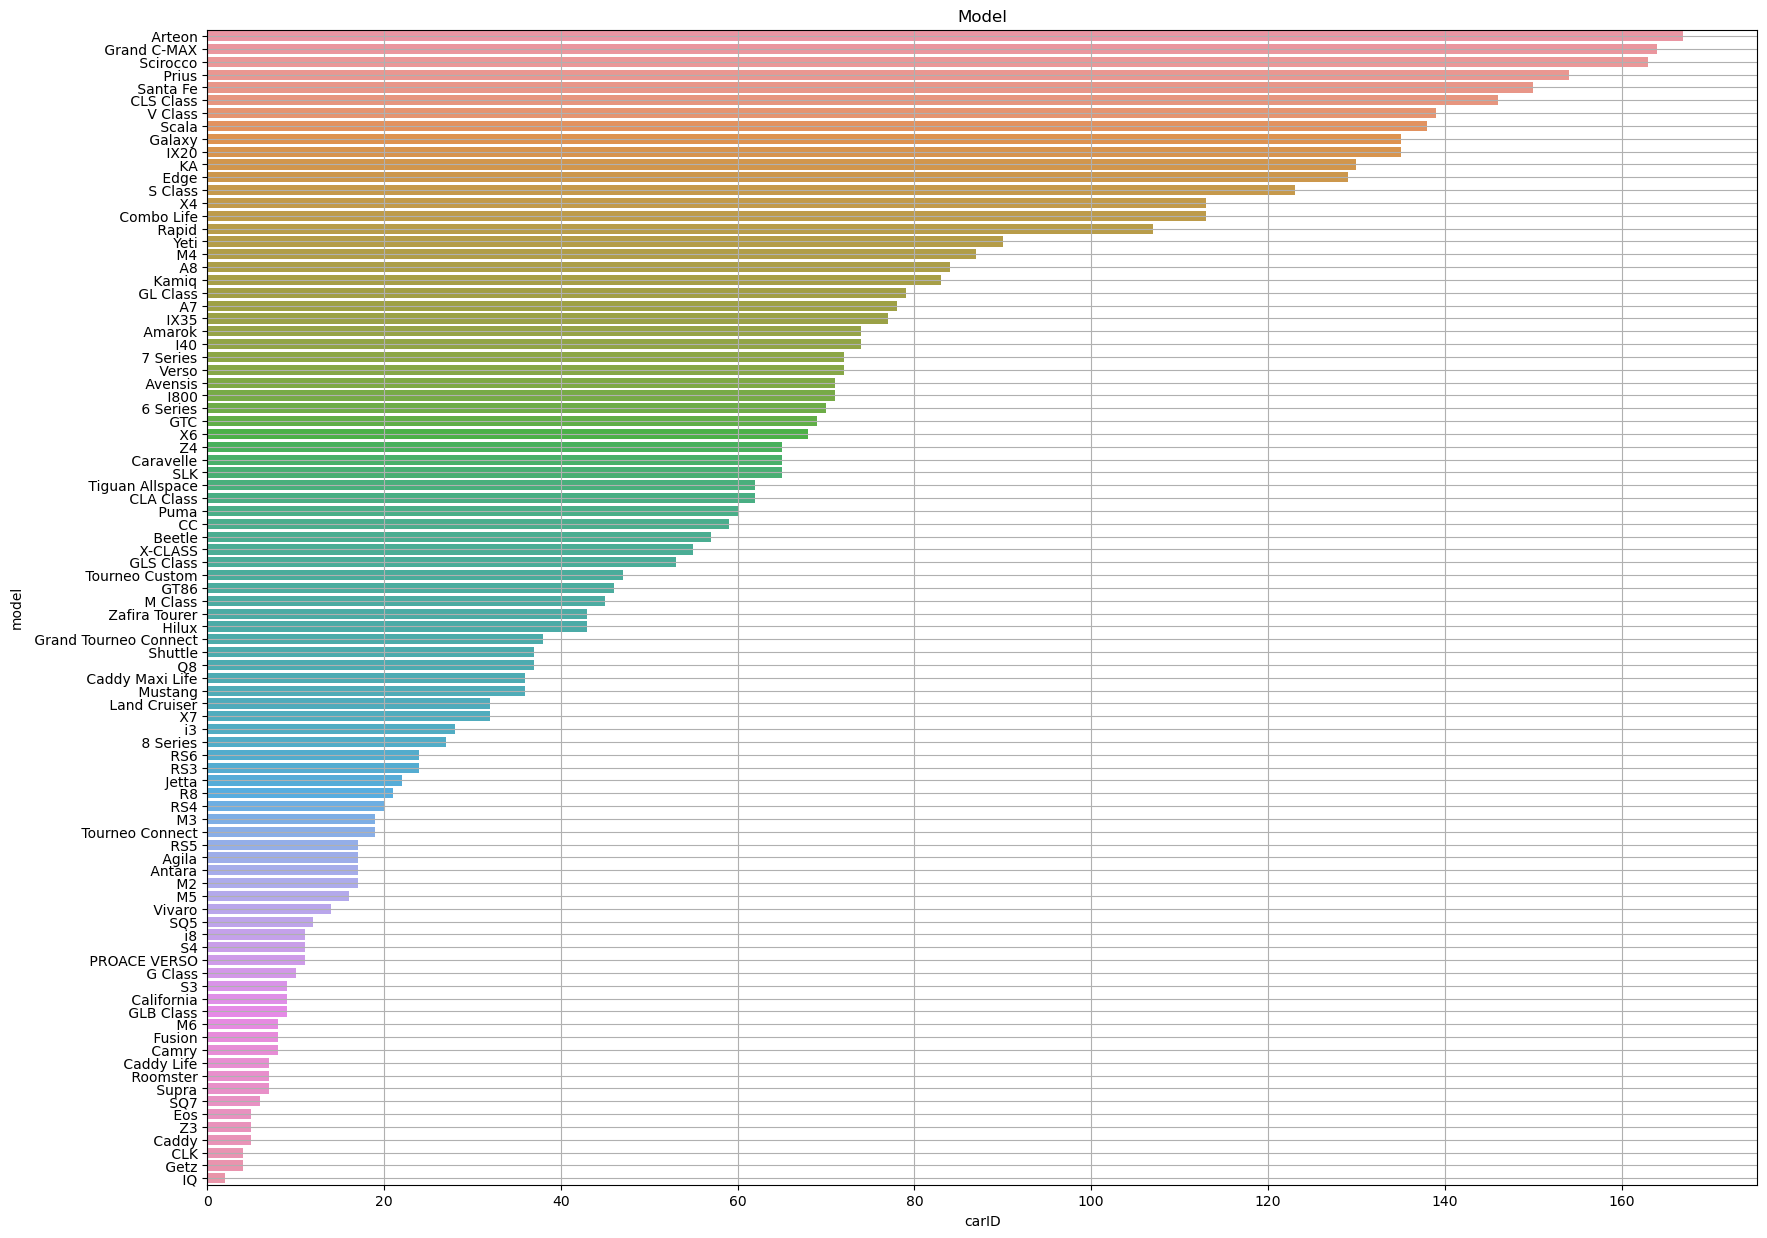

In [28]:
plt.figure(figsize=(20,15))
sns.barplot(data=df_train,
            y=df_train.groupby('model').count().index,
            x=df_train.groupby('model').count()['carID'],
            order=df_train.groupby('model').count().sort_values('carID',ascending=False).index)
plt.title('Model')
plt.grid()

## EDA

A couple of this variables do seem to have some outliers that we may need to take care of

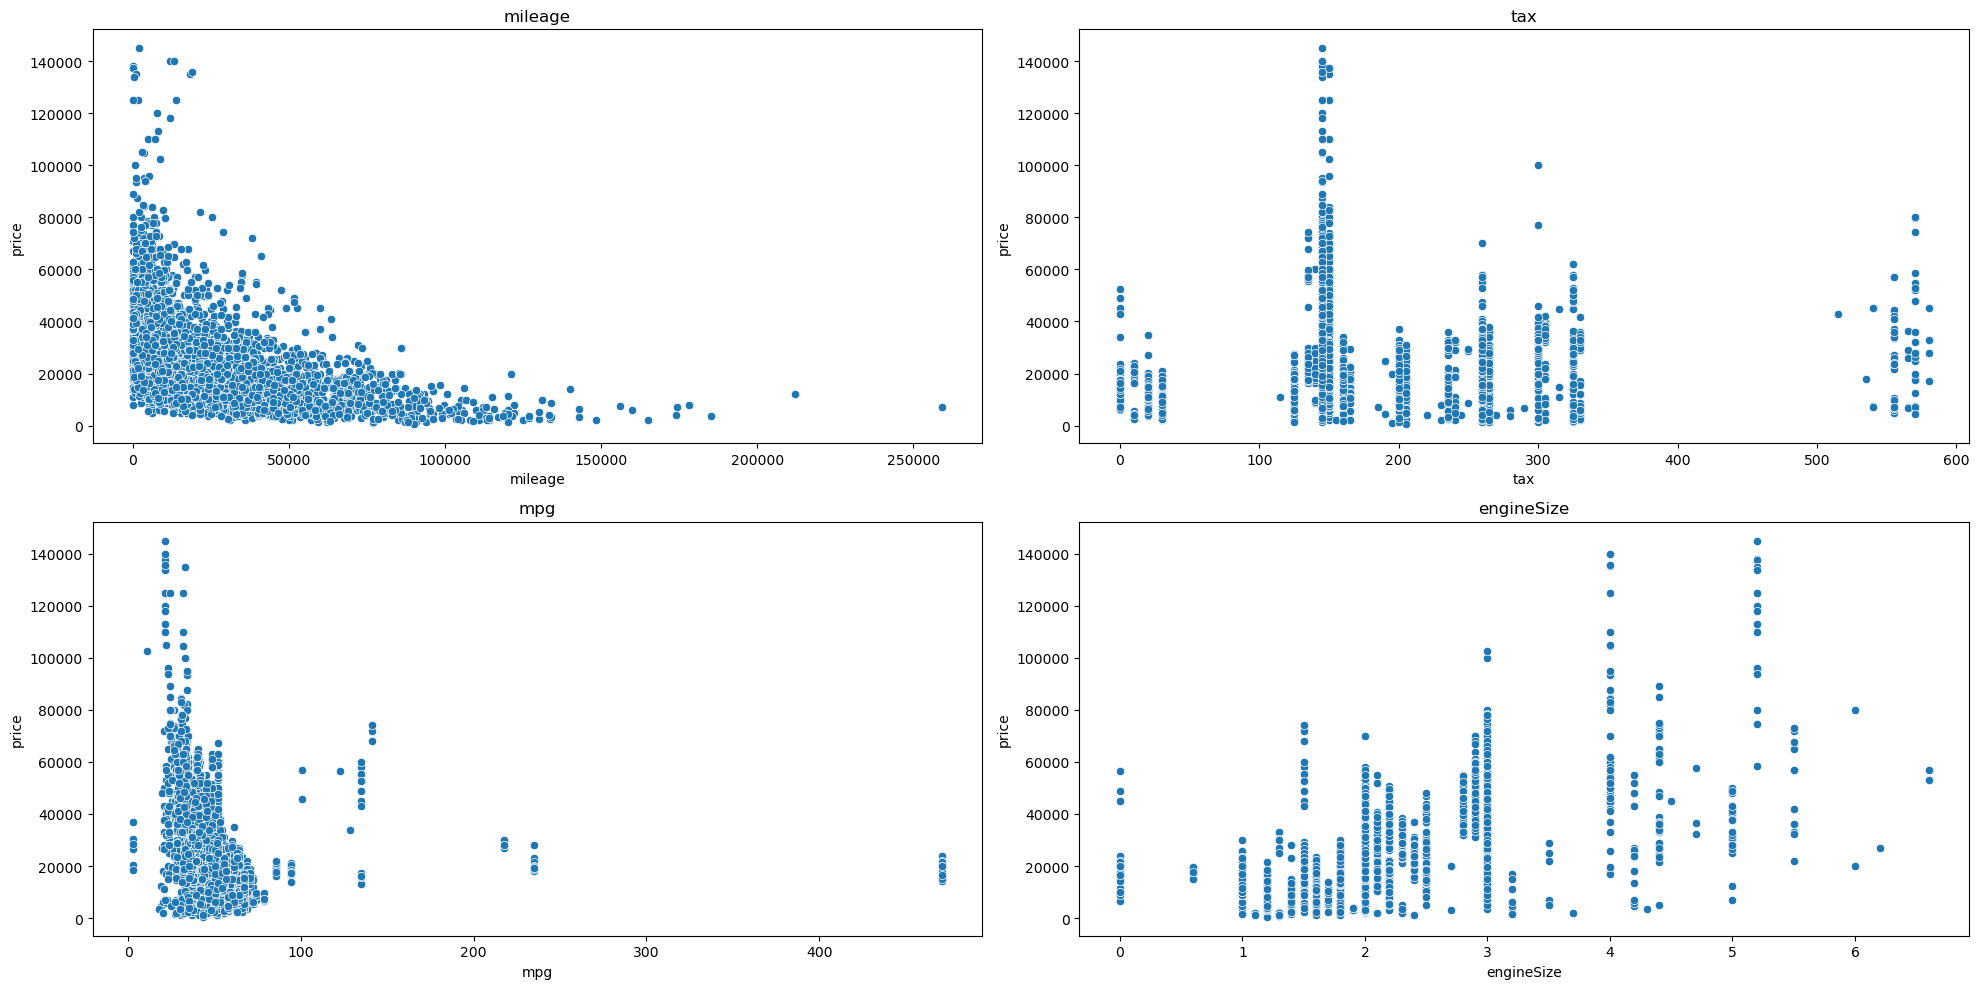

In [29]:
plt.figure(figsize=(20,10))

for index,i in enumerate(num_cols[2:-1]):
    plt.subplot(2,2,index+1)
    plt.tight_layout()
    sns.scatterplot(data=df_train,
                   x=df_train[i],
                   y=df_train['price'])
    plt.title(i)

There seems to be outliers in a couple of our features, we can still do some further analysis before we drop these data points in order to discern certain relationships

## Analysis by Carmaker

In [30]:
count_of_models_by_brand = df_train.groupby('brand').nunique()['model'].sort_values(ascending=False)
count_of_models_by_brand

brand
bmw         15
vw          14
audi        12
merc        12
ford        10
toyota      10
hyundi       6
vauxhall     6
skoda        5
Name: model, dtype: int64

In [31]:
count_of_transmissions_by_brand = df_train.groupby(['brand','transmission']).count()['carID']
count_of_transmissions_by_brand

brand     transmission
audi      Automatic       194
          Manual            8
          Semi-Auto       141
bmw       Automatic       238
          Manual           29
          Semi-Auto       371
ford      Automatic       112
          Manual          557
          Semi-Auto        97
hyundi    Automatic       115
          Manual          309
          Semi-Auto        87
merc      Automatic       473
          Manual           74
          Semi-Auto       243
skoda     Automatic        46
          Manual          262
          Other             1
          Semi-Auto       116
toyota    Automatic       231
          Manual          170
          Semi-Auto        45
vauxhall  Automatic        30
          Manual          240
          Semi-Auto         3
vw        Automatic       221
          Manual          299
          Semi-Auto       248
Name: carID, dtype: int64

In [32]:
count_of_fuel_by_brand = df_train.groupby(['brand','fuelType']).count()['carID']
count_of_fuel_by_brand

brand     fuelType
audi      Diesel      202
          Petrol      141
bmw       Diesel      305
          Electric      2
          Hybrid       33
          Other         6
          Petrol      292
ford      Diesel      470
          Hybrid        1
          Petrol      295
hyundi    Diesel      375
          Petrol      136
merc      Diesel      672
          Hybrid        6
          Petrol      112
skoda     Diesel       96
          Other         4
          Petrol      325
toyota    Diesel      148
          Hybrid      149
          Other        15
          Petrol      134
vauxhall  Diesel      142
          Petrol      131
vw        Diesel      579
          Other         1
          Petrol      188
Name: carID, dtype: int64

In [33]:
mpg_avg_by_brand = df_train.groupby(['brand','model']).mean(numeric_only=True)['mpg']
mpg_avg_by_brand

brand  model           
audi    A7                 48.312821
        A8                 43.819048
        Q8                 32.932432
        R8                 22.633333
        RS3                32.704167
                             ...    
vw      Eos                48.360000
        Jetta              66.059091
        Scirocco           52.351534
        Shuttle            41.113514
        Tiguan Allspace    40.340323
Name: mpg, Length: 90, dtype: float64

In [34]:
engSize_avg_by_brand = df_train.groupby(['brand','model']).mean(numeric_only=True)['engineSize']
engSize_avg_by_brand

brand  model           
audi    A7                 2.884615
        A8                 3.066667
        Q8                 3.081081
        R8                 5.009524
        RS3                2.500000
                             ...   
vw      Eos                1.880000
        Jetta              1.927273
        Scirocco           1.926380
        Shuttle            2.000000
        Tiguan Allspace    1.916129
Name: engineSize, Length: 90, dtype: float64

In [35]:
price_avg_by_brand = df_train.groupby(['brand','model']).mean(numeric_only=True)['price']
price_avg_by_brand

brand  model           
audi    A7                 28311.230769
        A8                 34083.119048
        Q8                 59517.540541
        R8                 99810.571429
        RS3                34526.750000
                               ...     
vw      Eos                 6474.000000
        Jetta               8620.409091
        Scirocco           13626.503067
        Shuttle            24715.297297
        Tiguan Allspace    28752.548387
Name: price, Length: 90, dtype: float64

In [36]:
df_train['brandModel'] = df_train['brand']+" - "+df_train['model']
df_train

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price,brandModel
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2,31995,hyundi - Santa Fe
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0,7700,vauxhall - GTC
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9,58990,audi - RS4
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0,12999,vw - Scirocco
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0,16990,skoda - Scala
...,...,...,...,...,...,...,...,...,...,...,...,...
4955,16898,merc,GL Class,2015,Automatic,24314,Diesel,125.0,56.6,2.1,17999,merc - GL Class
4956,14416,bmw,6 Series,2017,Automatic,18000,Diesel,145.0,51.4,3.0,28900,bmw - 6 Series
4957,15453,vw,CC,2015,Manual,84932,Diesel,30.0,60.1,2.0,8998,vw - CC
4958,14666,audi,A7,2017,Semi-Auto,30150,Diesel,145.0,62.8,3.0,23198,audi - A7


Text(0.5, 1.0, 'Top 30 brands with best mpg')

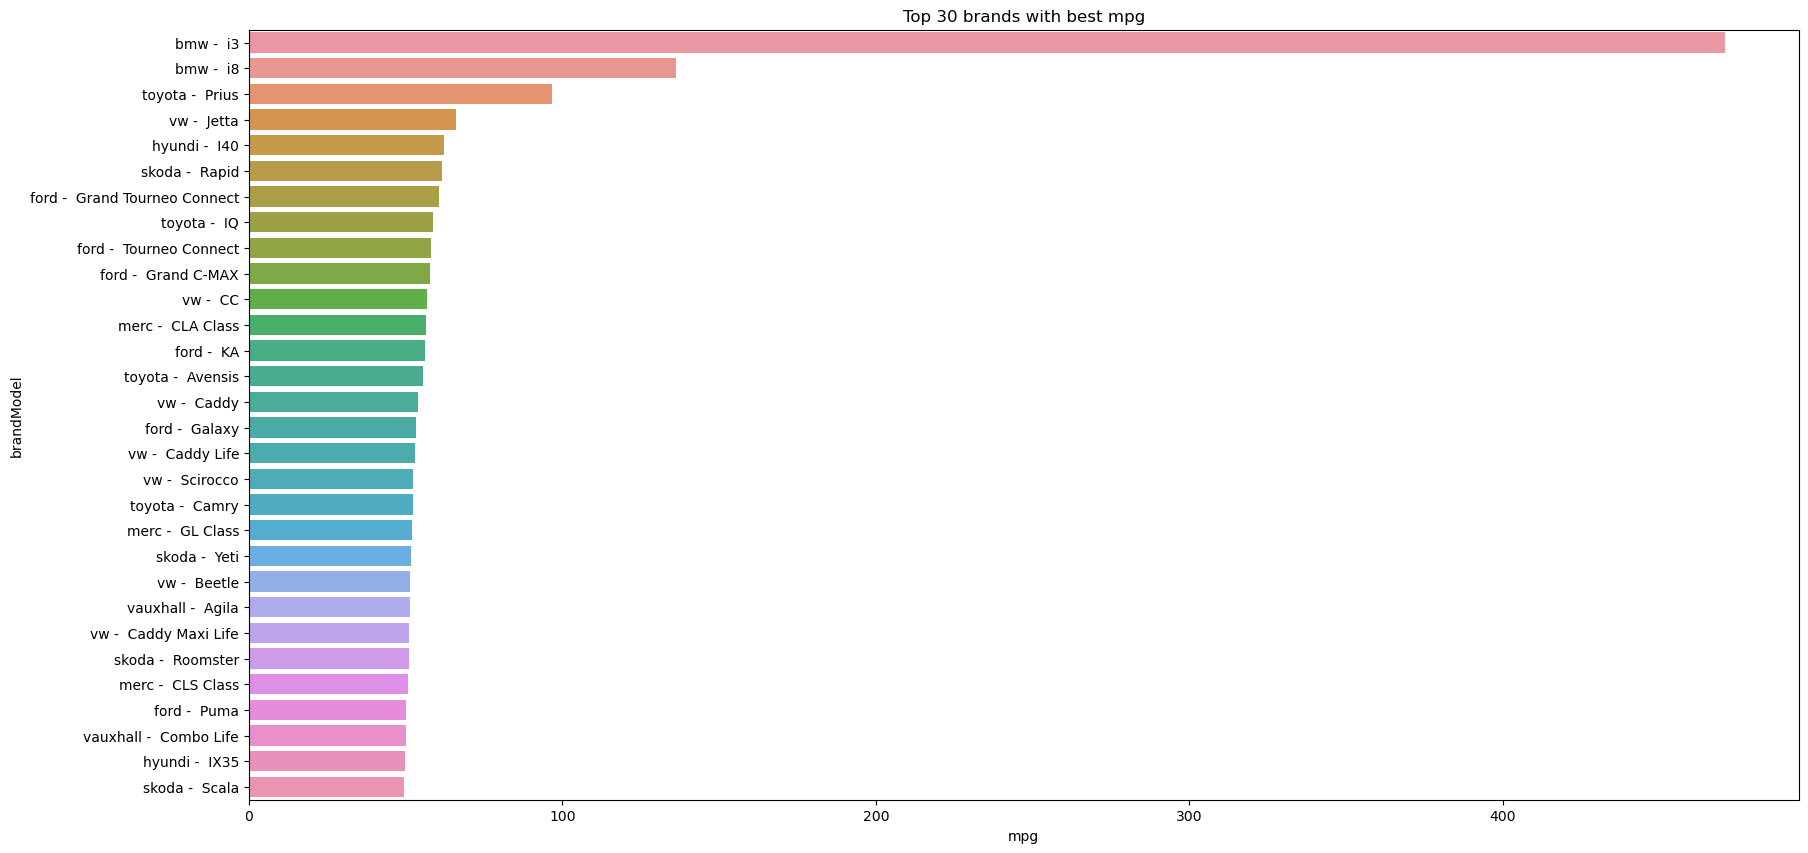

In [37]:
best_mpg_by_model = df_train.groupby('brandModel').mean(numeric_only=True).sort_values('mpg',ascending=False).head(30)

plt.figure(figsize=(20,10))
sns.barplot(data=best_mpg_by_model,
           y=best_mpg_by_model.index,
           x=best_mpg_by_model['mpg'])
plt.title("Top 30 brands with best mpg")

It seems a bit odd that the top model has such a huge difference with the rest, this could be an indicator of the outliers we observed in our scatterplots, we can plot it again and highlight this model to verify it.

Text(0.5, 1.0, 'Models MPG vs Price')

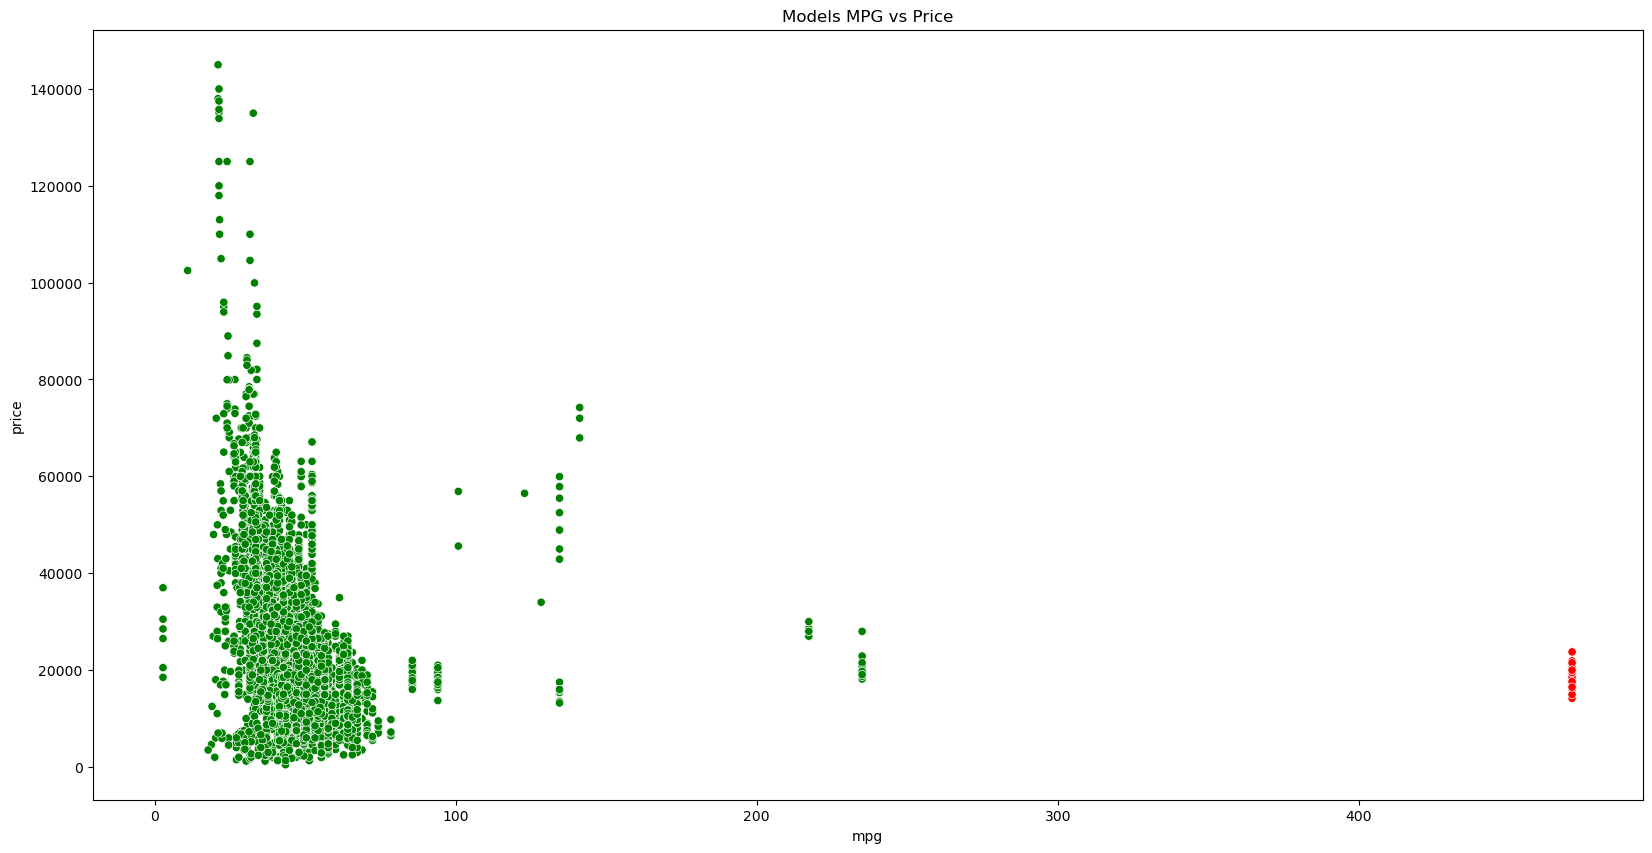

In [38]:
plt.figure(figsize=(20,10))
bmw_i3 = (df_train['brandModel'] == 'bmw -  i3')
sns.scatterplot(data=df_train,
                x='mpg', y='price',
                color=['red' if x else 'green' for x in bmw_i3])
plt.title('Models MPG vs Price')

All of the data points from this specific model cluster around the same value, this means that it is consistent amongst all of the observations which makes it lilely for it not to be a mistake.

Text(0.5, 1.0, 'brands with biggest engine size')

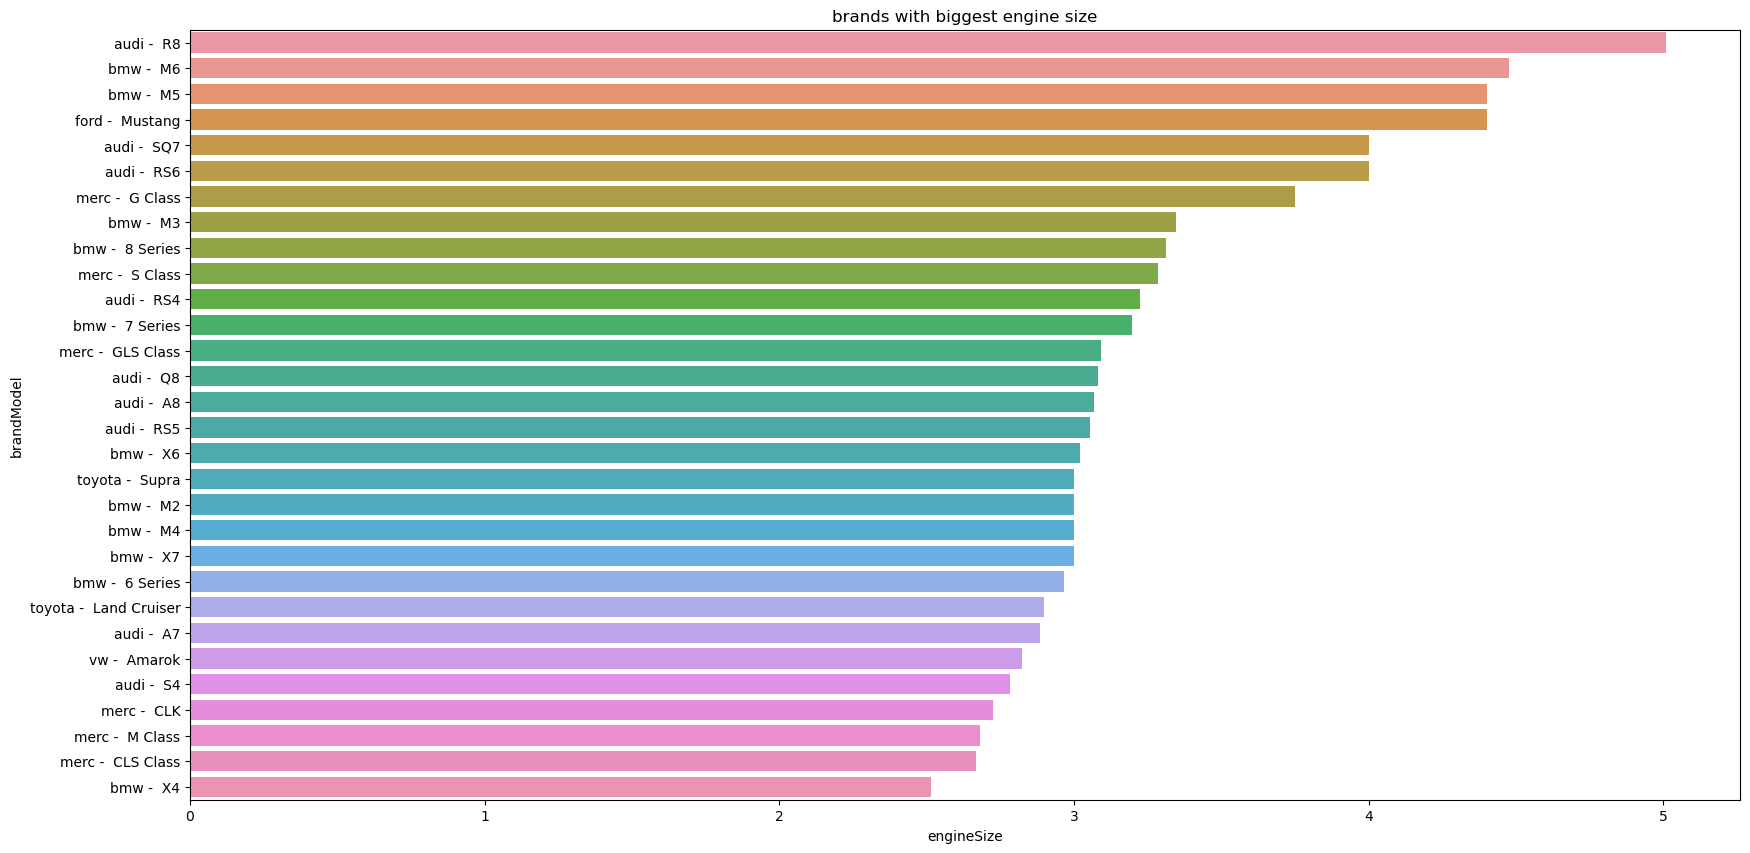

In [39]:
engSize_by_model = df_train.groupby('brandModel').mean(numeric_only=True).sort_values('engineSize',ascending=False).head(30)

plt.figure(figsize=(20,10))
sns.barplot(data=engSize_by_model,
           y=engSize_by_model.index,
           x=engSize_by_model['engineSize'])
plt.title("brands with biggest engine size")

Text(0.5, 1.0, 'Top 30 brands by price')

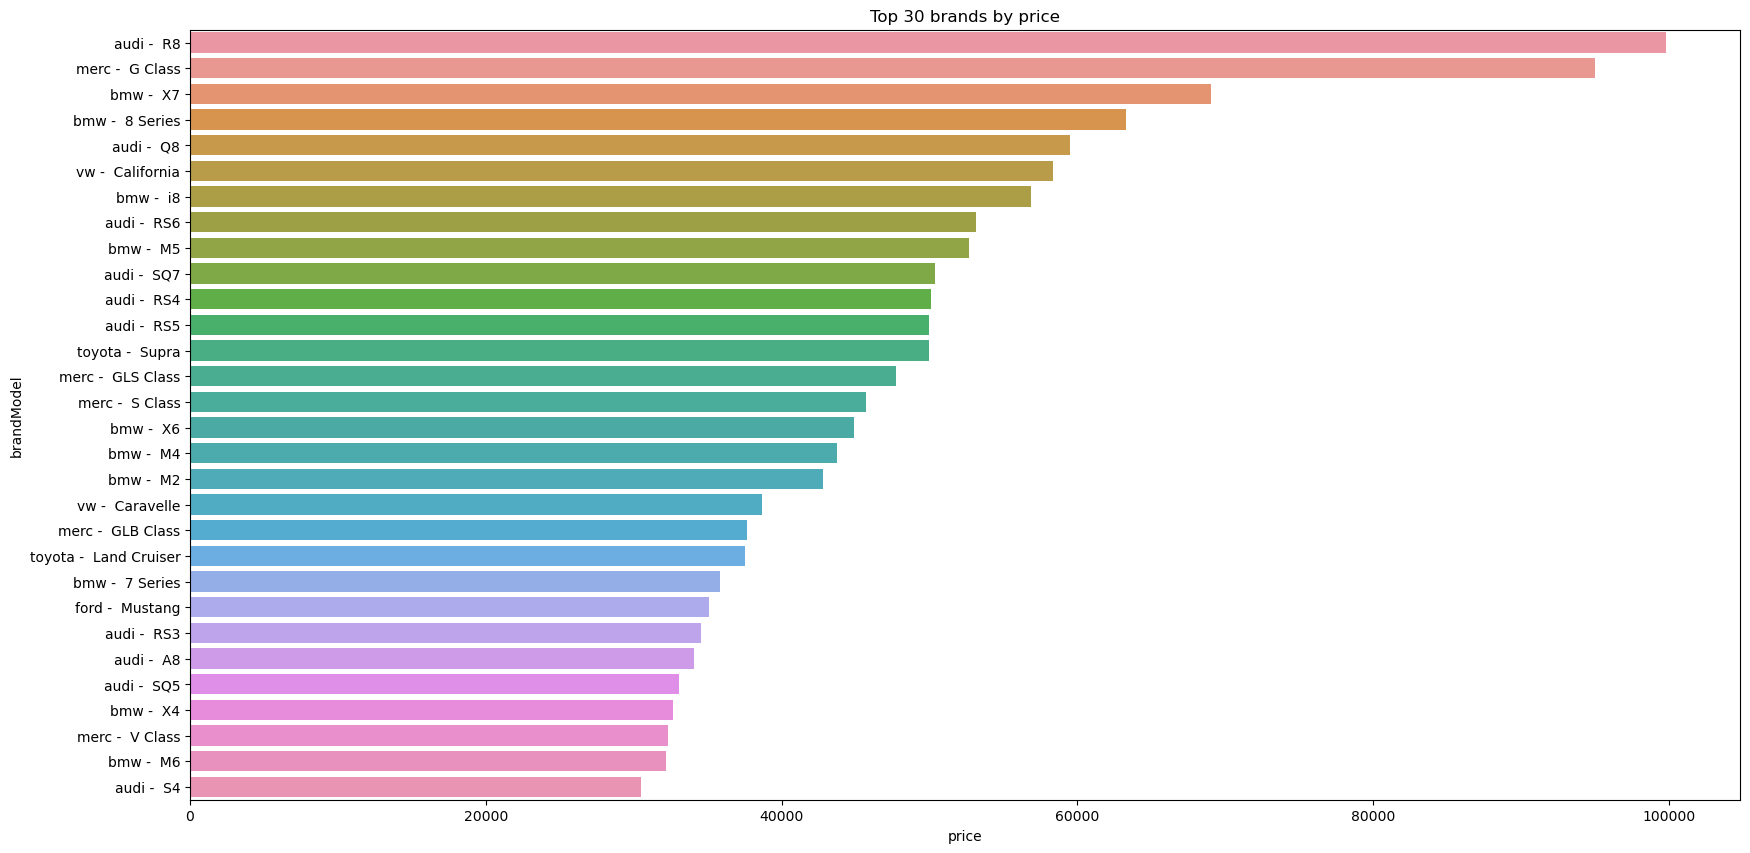

In [40]:
top_models_by_price = df_train.groupby('brandModel').mean(numeric_only=True).sort_values('price',ascending=False).head(30)

plt.figure(figsize=(20,10))
sns.barplot(data=top_models_by_price,
           y=top_models_by_price.index,
           x=top_models_by_price['price'])
plt.title("Top 30 brands by price")

is there improvement over the years in terms of efficiency? 

Text(0.5, 1.0, 'Mpg average by year')

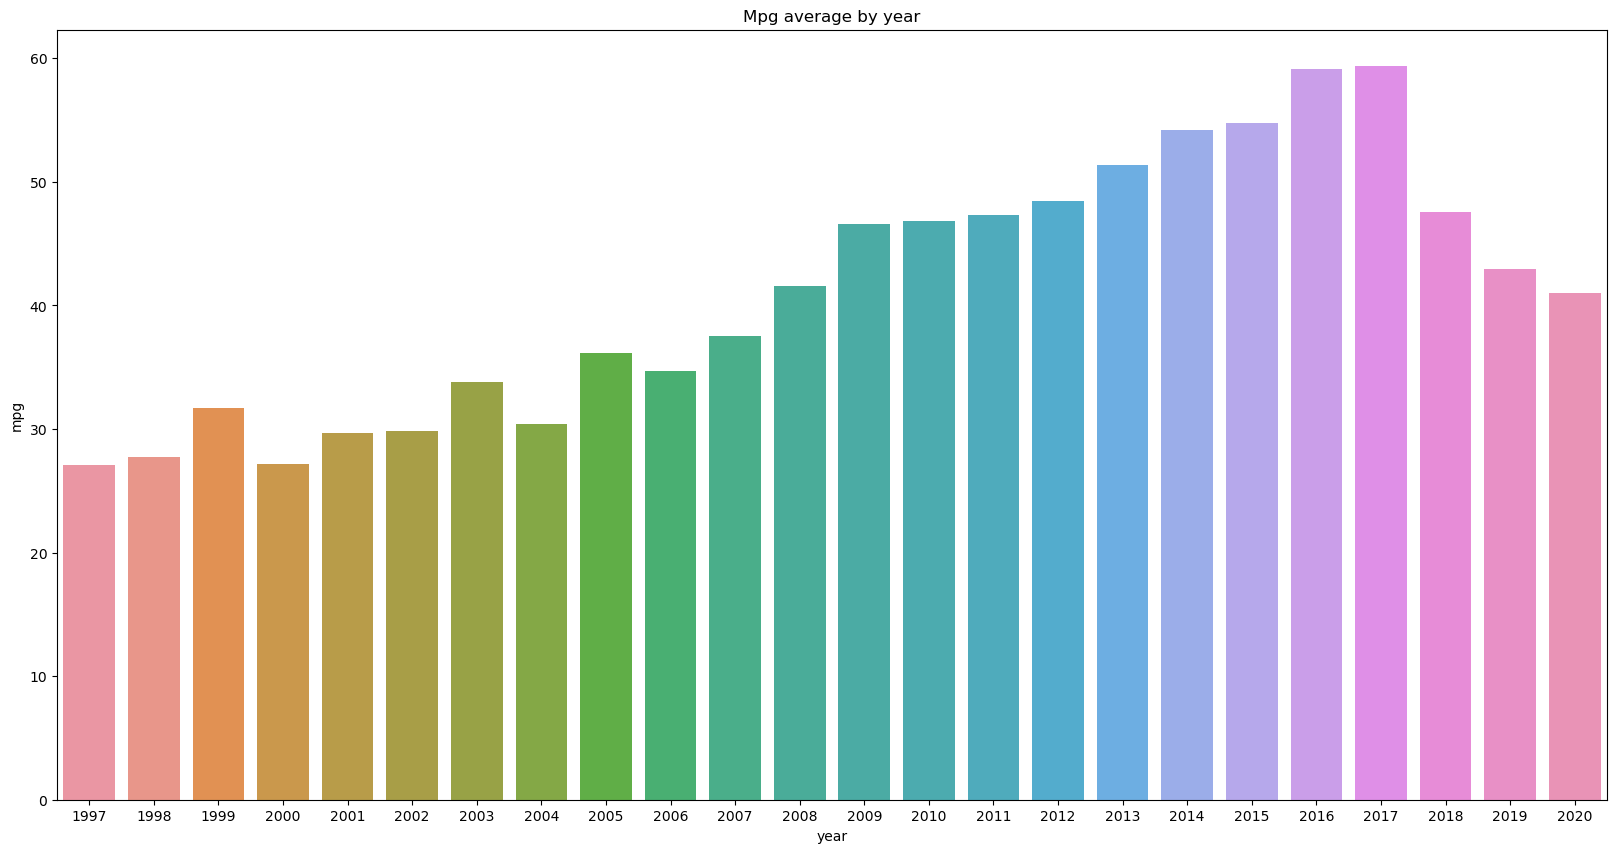

In [41]:
mpg_by_year = df_train.groupby('year').mean(numeric_only=True).sort_values('mpg', ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(data=mpg_by_year,
            y=mpg_by_year['mpg'],
            x=mpg_by_year.index)
plt.title('Mpg average by year')

In [42]:
count_by_transmission = df_train.groupby(['transmission'])['transmission'].count().sort_values(ascending=False)
count_by_transmission

transmission
Manual       1948
Automatic    1660
Semi-Auto    1351
Other           1
Name: transmission, dtype: int64

In [43]:
engSize_avg_by_transmission = df_train.groupby(['transmission'])['engineSize'].mean().sort_values(ascending=False)
engSize_avg_by_transmission

transmission
Semi-Auto    2.475352
Automatic    2.388193
Manual       1.656725
Other        1.000000
Name: engineSize, dtype: float64

In [44]:
count_by_fuelType = df_train.groupby(['fuelType'])['fuelType'].count().sort_values(ascending=False)
count_by_fuelType

fuelType
Diesel      2989
Petrol      1754
Hybrid       189
Other         26
Electric       2
Name: fuelType, dtype: int64

Text(0.5, 1.0, 'Relationship between mpg and engine size')

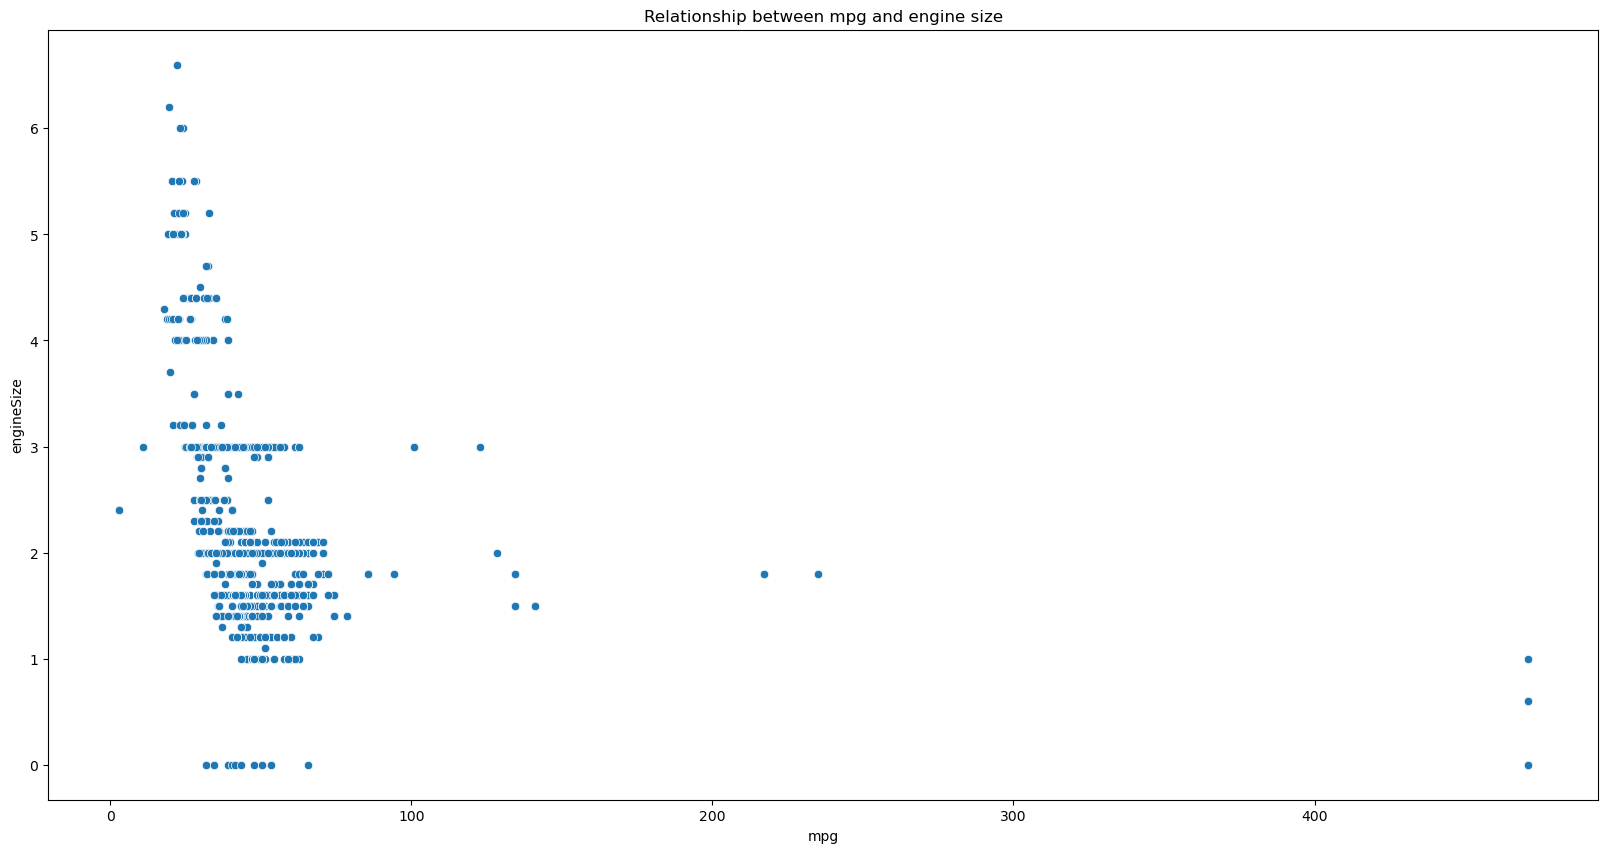

In [45]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_train, x='mpg', y='engineSize')
plt.title('Relationship between mpg and engine size')

Text(0.5, 1.0, 'Relationship between mpg and engine size')

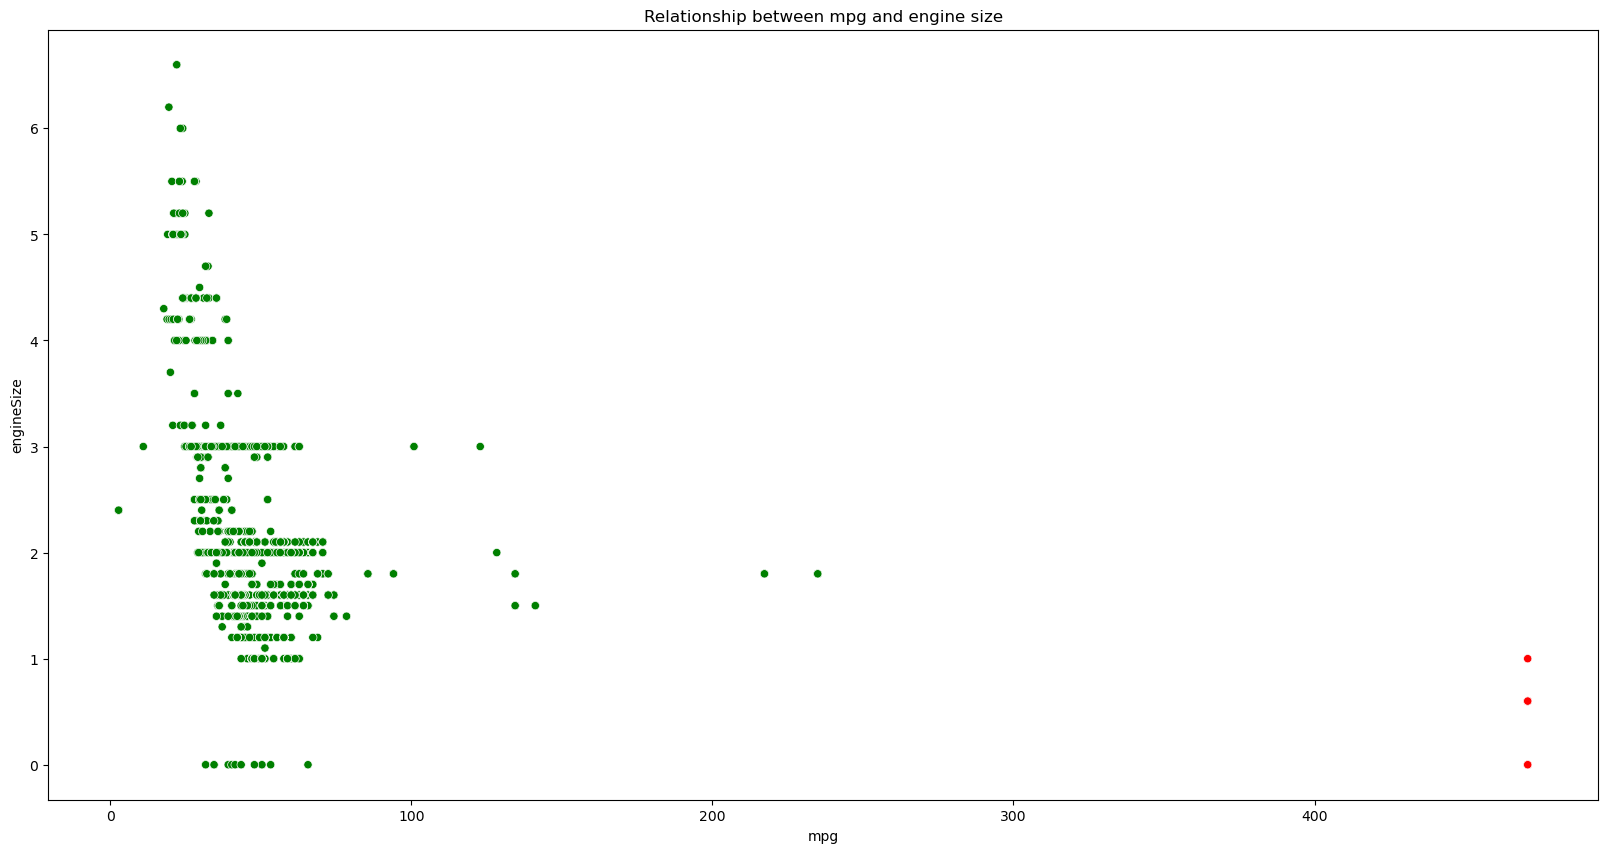

In [46]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_train,
                x='mpg',
                y='engineSize',
                color=['red' if x else 'green' for x in bmw_i3])
plt.title('Relationship between mpg and engine size')

In [47]:
df_train[df_train['brandModel'] == 'bmw -  i3']

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price,brandModel
50,13304,bmw,i3,2017,Automatic,20929,Hybrid,135.0,470.8,0.0,19948,bmw - i3
110,14766,bmw,i3,2016,Automatic,25269,Other,0.0,470.8,0.6,17100,bmw - i3
161,18228,bmw,i3,2017,Automatic,24041,Hybrid,0.0,470.8,0.0,21495,bmw - i3
256,14155,bmw,i3,2017,Automatic,17338,Hybrid,135.0,470.8,0.0,19495,bmw - i3
767,14751,bmw,i3,2016,Automatic,41063,Other,0.0,470.8,0.6,17000,bmw - i3
969,19545,bmw,i3,2016,Automatic,9990,Electric,0.0,470.8,0.0,18999,bmw - i3
1005,17362,bmw,i3,2016,Automatic,68000,Hybrid,0.0,470.8,0.0,15990,bmw - i3
1053,15421,bmw,i3,2015,Automatic,29465,Electric,0.0,470.8,1.0,17400,bmw - i3
1374,19225,bmw,i3,2016,Automatic,35446,Hybrid,0.0,470.8,0.0,16500,bmw - i3
1544,13641,bmw,i3,2017,Automatic,32867,Other,0.0,470.8,0.6,19300,bmw - i3


In [48]:
len(df_train[df_train['engineSize'] == 0])

34

In [49]:
df_train.drop(df_train[df_train['mileage'] > 200000].index, inplace=True)

In [50]:
df_train.drop(df_train[df_train['tax'] > 400].index, inplace=True)

In [51]:
df_train.drop(df_train[df_train['mpg'] > 150].index, inplace=True)

In [52]:
df_train.drop(df_train[df_train['engineSize'] == 0].index, inplace=True)

In [53]:
df_train.drop('carID',axis=1,inplace=True)

In [54]:
df_train.drop(['brand','model'],axis=1,inplace=True)

In [55]:
cat_cols.append('brandModel')

In [56]:
df1 = df_train

In [57]:
for i in cat_cols[2:]:
    temp = pd.get_dummies(df1[i], drop_first=True)
    df1.drop(i, axis=1, inplace=True)
    df1 = pd.concat([df1,temp],axis=1)

In [58]:
df1

,year,mileage,tax,mpg,engineSize,price,Manual,Other,Semi-Auto,Hybrid,...,vw - Caddy,vw - Caddy Life,vw - Caddy Maxi Life,vw - California,vw - Caravelle,vw - Eos,vw - Jetta,vw - Scirocco,vw - Shuttle,vw - Tiguan Allspace
0,2019,4223,145.0,39.8,2.2,31995,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,47870,125.0,60.1,2.0,7700,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2019,5151,145.0,29.1,2.9,58990,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016,20423,30.0,57.6,2.0,12999,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2020,3569,145.0,47.1,1.0,16990,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,2015,24314,125.0,56.6,2.1,17999,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4956,2017,18000,145.0,51.4,3.0,28900,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4957,2015,84932,30.0,60.1,2.0,8998,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4958,2017,30150,145.0,62.8,3.0,23198,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## First Model

In [59]:
X = df1.drop('price', axis=1)
y = df1['price']

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [61]:
ln_reg = LinearRegression()

In [62]:
rg_reg = Ridge()

In [63]:
ls_reg = Lasso()

In [64]:
dt_reg = DecisionTreeRegressor()

In [65]:
rf_reg = RandomForestRegressor()

In [66]:
regressors = [ln_reg,rg_reg,ls_reg,dt_reg,rf_reg]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [68]:
for i in regressors:
    i.fit(X_train,y_train)
    pred = i.predict(X_test)
    print("The score for ",i, " is ", r2_score(y_test, pred))
    print("The mean sqaured error for ",i, " is ", mean_squared_error(y_test, pred, squared=False))

The score for  LinearRegression()  is  0.8891622615217629
The mean sqaured error for  LinearRegression()  is  5534.81385760447
The score for  Ridge()  is  0.8873754219632428
The mean sqaured error for  Ridge()  is  5579.249460331015
The score for  Lasso()  is  0.889346726231405
The mean sqaured error for  Lasso()  is  5530.2062077347
The score for  DecisionTreeRegressor()  is  0.8640127195198993
The mean sqaured error for  DecisionTreeRegressor()  is  6130.67559492904
The score for  RandomForestRegressor()  is  0.9141746006041696
The mean sqaured error for  RandomForestRegressor()  is  4870.427783784437


## How can we improve our model

C:\Users\Marcos Verdi\AppData\Local\Temp\ipykernel_2452\1252855801.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.drop('price',axis=1).corr(),annot=True)


<Axes: >

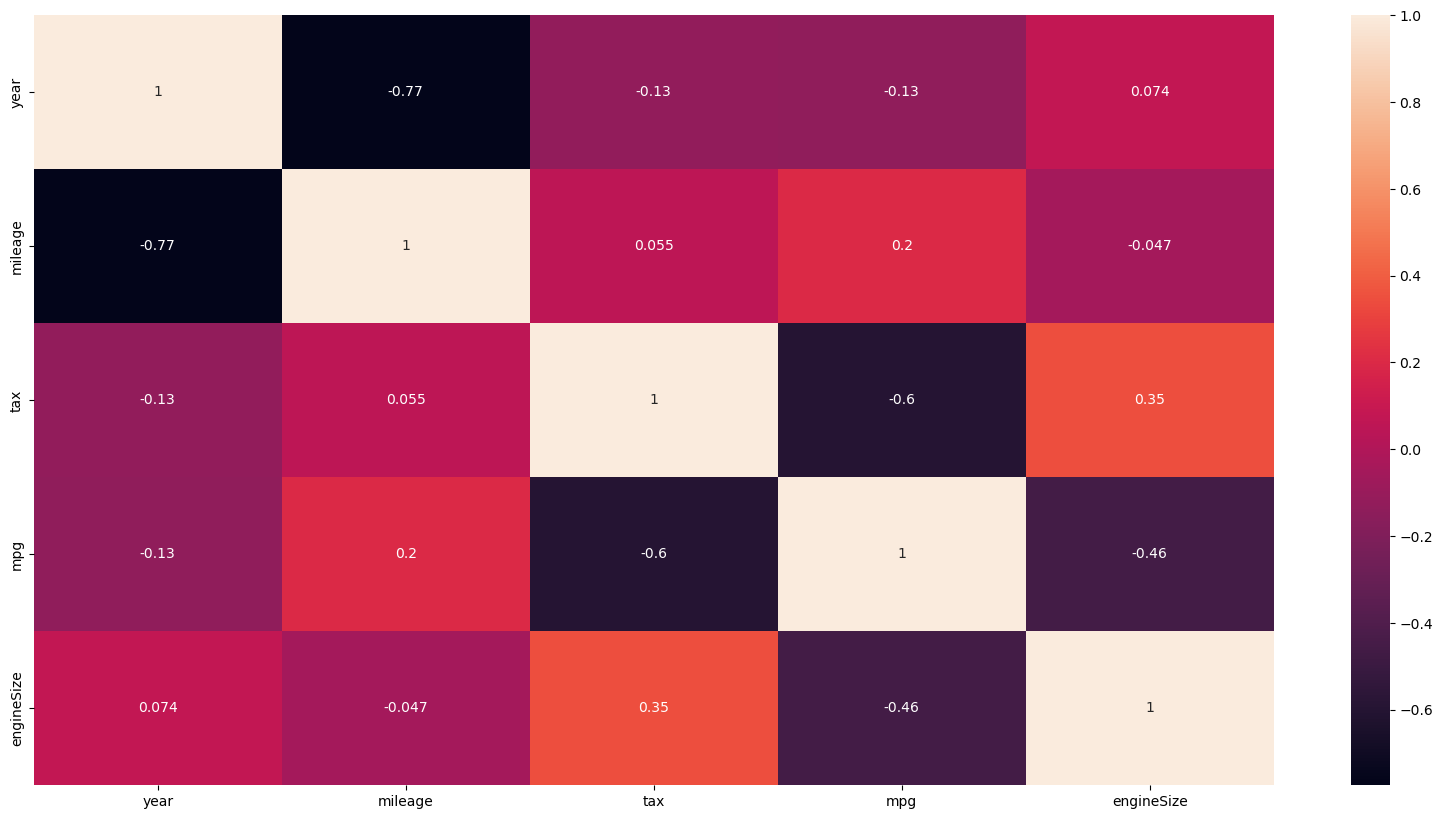

In [69]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.drop('price',axis=1).corr(),annot=True)

We can get rid of year or mileage given their strong correlation. Also mpg and tax seem to have a strong correlation but we may be able to work with both.

In [70]:
df2 = df1

In [71]:
df2.drop('mileage',axis=1,inplace=True)

In [72]:
df2

,year,tax,mpg,engineSize,price,Manual,Other,Semi-Auto,Hybrid,Other,...,vw - Caddy,vw - Caddy Life,vw - Caddy Maxi Life,vw - California,vw - Caravelle,vw - Eos,vw - Jetta,vw - Scirocco,vw - Shuttle,vw - Tiguan Allspace
0,2019,145.0,39.8,2.2,31995,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,125.0,60.1,2.0,7700,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2019,145.0,29.1,2.9,58990,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016,30.0,57.6,2.0,12999,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2020,145.0,47.1,1.0,16990,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,2015,125.0,56.6,2.1,17999,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4956,2017,145.0,51.4,3.0,28900,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4957,2015,30.0,60.1,2.0,8998,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4958,2017,145.0,62.8,3.0,23198,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
X = df1.drop('price', axis=1)
y = df1['price']

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [75]:
for i in regressors:
    i.fit(X_train,y_train)
    pred = i.predict(X_test)
    print("The score for ",i, " is ", r2_score(y_test, pred))
    print("The mean sqaured error for ",i, " is ", mean_squared_error(y_test, pred, squared=False))

The score for  LinearRegression()  is  0.8807687127794397
The mean sqaured error for  LinearRegression()  is  5740.560627257406
The score for  Ridge()  is  0.8787126355129413
The mean sqaured error for  Ridge()  is  5789.845451483415
The score for  Lasso()  is  0.8810680774675728
The mean sqaured error for  Lasso()  is  5733.349427707322
The score for  DecisionTreeRegressor()  is  0.9061324043148573
The mean sqaured error for  DecisionTreeRegressor()  is  5093.508540390124
The score for  RandomForestRegressor()  is  0.9448958286073367
The mean sqaured error for  RandomForestRegressor()  is  3902.576542616746


There has been little improvement in most models but for our random forest regressor the improvement has been more significant and we achieve 95% accuracy.

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [82]:
parameters = { 'loss' : ['ls', 'lad', 'huber', 'quantile'],
              'learning_rate' : (0.05,0.25,0.50,1),
              'criterion' : ['friedman_mse', 'mse', 'mae'],
              'max_features' : ['auto', 'sqrt', 'log2']
             }

In [83]:
grid = GridSearchCV(GradientBoostingRegressor(),parameters)
model = grid.fit(X_train,y_train)
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')
print(model.best_score_)

c:\Users\Marcos Verdi\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\Marcos Verdi\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\Marcos Verdi\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\Marcos Verdi\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  war

{'criterion': 'friedman_mse', 'learning_rate': 0.5, 'loss': 'huber', 'max_features': 'auto'} 

GradientBoostingRegressor(learning_rate=0.5, loss='huber', max_features='auto') 

0.945560740261773
